# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['carnarvon',
 'jamestown',
 'upernavik',
 'taolanaro',
 'saint-philippe',
 'egvekinot',
 'lebu',
 'lompoc',
 'ushuaia',
 'dhidhdhoo',
 'nizhneyansk',
 'mar del plata',
 'kavaratti',
 'rikitea',
 'touros',
 'belushya guba',
 'tabiauea',
 'lalomanu',
 'saleaula',
 'lata',
 'castro',
 'oranjemund',
 'albany',
 'presidencia roque saenz pena',
 'port alfred',
 'chokurdakh',
 'busselton',
 'teofilo otoni',
 'rawson',
 'ewa beach',
 'longyearbyen',
 'kiruna',
 'khatanga',
 'valle de allende',
 'punta arenas',
 'alta floresta',
 'erzin',
 'mataura',
 'cherskiy',
 'saldanha',
 'kiama',
 'honiara',
 'kati',
 'port-cartier',
 'kazalinsk',
 'aykhal',
 'padang',
 'hithadhoo',
 'novyy urengoy',
 'port elizabeth',
 'buraydah',
 'te anau',
 'lodja',
 'dacice',
 'provideniya',
 'vao',
 'bredasdorp',
 'riyadh',
 'bathsheba',
 'souillac',
 'new norfolk',
 'amderma',
 'batagay-alyta',
 'arraial do cabo',
 'papara',
 'kendari',
 'butaritari',
 'martinsburg',
 'kaffrine',
 'henzada',
 'lolua',
 'atuona',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Build url

# url = f'api.openweathermap.org/data/2.5/weather?q={cities}&appid={API key}'
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 37.5,
        "lon": 61.97
    },
    "dt": 1605810170,
    "id": 1218612,
    "main": {
        "feels_like": 262.36,
        "humidity": 53,
        "pressure": 1039,
        "temp": 267.15,
        "temp_max": 267.15,
        "temp_min": 267.15
    },
    "name": "Murgab",
    "sys": {
        "country": "TM",
        "id": 8990,
        "sunrise": 1605753375,
        "sunset": 1605789550,
        "type": 1
    },
    "timezone": 18000,
    "visibility": 6000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 2.1
    }
}


In [24]:
# For loop to print cities

# Lists to hold info
city_name = []
lat = []
lng = []
temp_max = []
temp = []
humidity = []
clouds = []
wind = []
country = []
date = []


# Start count for cities and sets
city_count = 0
set_count = 1


url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}&units=imperial&appid={weather_api_key}&q="
response = requests.get(url).json()

# Get City, Lat, Lng, Max, Temp, Humidity, Cloudiness, Wind Speed, Country, Date
for city in cities:
    
    try:
        if city_count == 50:
            city_count = 0
            set_count = set_count + 1
        response = requests.get(query_url + city).json()
        city_count = city_count + 1
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
    
    print(f'Processing Record {city_count} of Set {set_count} | {city}')

Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | upernavik
City not found. Skipping...
Processing Record 4 of Set 1 | taolanaro
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | egvekinot
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | dhidhdhoo
City not found. Skipping...
Processing Record 11 of Set 1 | nizhneyansk
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | touros
City not found. Skipping...
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 1 | lalomanu
City not found. Skipping...
Processing Record 19 of Set 1 | saleaula
Processing Record 20 of Set 1 | lata
Processin

Processing Record 39 of Set 4 | anloga
Processing Record 40 of Set 4 | chaman
Processing Record 41 of Set 4 | eureka
Processing Record 42 of Set 4 | bilibino
Processing Record 43 of Set 4 | christchurch
Processing Record 44 of Set 4 | labytnangi
Processing Record 45 of Set 4 | berlevag
Processing Record 46 of Set 4 | manono
City not found. Skipping...
Processing Record 47 of Set 4 | mendahara
City not found. Skipping...
Processing Record 48 of Set 4 | marcona
Processing Record 49 of Set 4 | shwebo
Processing Record 50 of Set 4 | shingu
Processing Record 1 of Set 5 | acarau
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | pingliang
Processing Record 4 of Set 5 | ban nahin
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | paita
Processing Record 7 of Set 5 | gizo
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | debre tabor
Processing Record 10 of Set 5 | klaksvik
Processing Record 11 of Set 5 | mosquera
City not found. Skip

Processing Record 27 of Set 8 | tecoanapa
Processing Record 28 of Set 8 | berkakit
Processing Record 29 of Set 8 | sabha
Processing Record 30 of Set 8 | coihaique
Processing Record 31 of Set 8 | gilroy
Processing Record 32 of Set 8 | mailsi
Processing Record 33 of Set 8 | thatta
Processing Record 34 of Set 8 | bondo
Processing Record 35 of Set 8 | veraval
Processing Record 36 of Set 8 | crotone
Processing Record 37 of Set 8 | aleksandrovskiy zavod
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | haines junction
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | lannion
Processing Record 42 of Set 8 | bischofswerda
Processing Record 43 of Set 8 | ambilobe
Processing Record 44 of Set 8 | kaeo
City not found. Skipping...
Processing Record 45 of Set 8 | inderborskiy
Processing Record 46 of Set 8 | saint george
Processing Record 47 of Set 8 | farsund
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | humberto de campos
Pro

Processing Record 15 of Set 12 | cape coast
Processing Record 16 of Set 12 | preston
Processing Record 17 of Set 12 | mana
Processing Record 18 of Set 12 | pionerskiy
Processing Record 19 of Set 12 | najran
Processing Record 20 of Set 12 | middle island
Processing Record 21 of Set 12 | pangani
Processing Record 22 of Set 12 | villa carlos paz
Processing Record 23 of Set 12 | kazanskoye
Processing Record 24 of Set 12 | ponta do sol
Processing Record 25 of Set 12 | waingapu
City not found. Skipping...
Processing Record 26 of Set 12 | samusu
Processing Record 27 of Set 12 | bandipur
Processing Record 28 of Set 12 | nchelenge
Processing Record 29 of Set 12 | lagunas
City not found. Skipping...
Processing Record 30 of Set 12 | mutsamudu
Processing Record 31 of Set 12 | saint-ambroise
Processing Record 32 of Set 12 | moron
Processing Record 33 of Set 12 | mazagao
Processing Record 34 of Set 12 | mukilteo
Processing Record 35 of Set 12 | birnin kebbi
Processing Record 36 of Set 12 | benghazi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [217]:

weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
})

weather_df.dtypes




City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [218]:
#  Get the indices of cities that have humidity over 100%.

humid_cities = weather_df.loc[weather_df["Humidity"] > 100]
humid_cities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [219]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

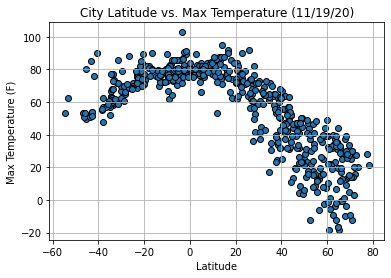

In [220]:
plt.scatter(lat, temp_max, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11/19/20)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

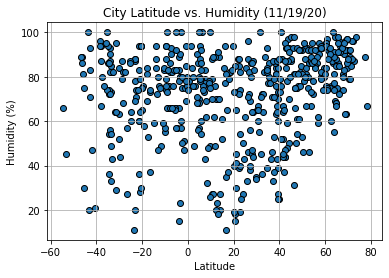

In [221]:
plt.scatter(lat, humidity, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11/19/20)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

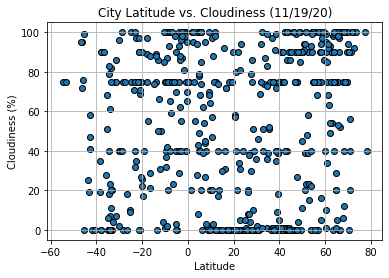

In [222]:
plt.scatter(lat, clouds, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/19/20)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

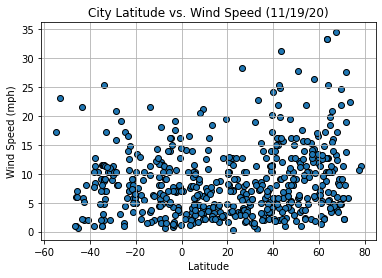

In [223]:
plt.scatter(lat, wind, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11/19/20)")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [224]:
# Convert to integer for linear regression
weather_df["Max Temp"] = weather_df["Max Temp"].astype(int)

# City latitudes in northern hemisphere only
north_df = weather_df.loc[weather_df["Lat"] >= 0]
north_hem = north_df["Lat"]

# Max temps of cities in northern hemisphere only
temp_max_north = north_df["Max Temp"]



The r-value is: -0.8638987438969609


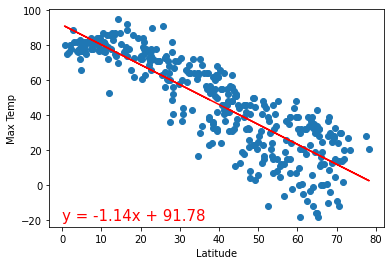

In [225]:
# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, temp_max_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, temp_max_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, temp_max_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6997348921508171


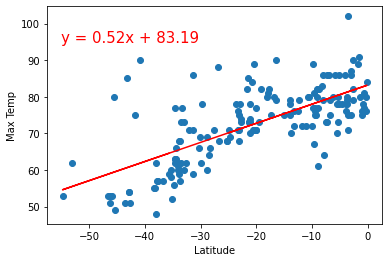

In [226]:
# City latitudes in southern hemisphere only
south_df = weather_df.loc[weather_df["Lat"] <= 0]
south_hem = south_df["Lat"]

# Max temps of cities in southern hemisphere only
temp_max_south = south_df["Max Temp"]

# Linear regression equation
correlation_coefficient = st.pearsonr(south_hem, temp_max_south)
correlation_coefficient = (correlation_coefficient[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem, temp_max_south)
regress_values = south_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_hem, temp_max_south)
plt.plot(south_hem,regress_values,"r-")

plt.annotate(line_eq,(-55,95),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [227]:
# Convert to integer for linear regression
weather_df["Humidity"] = weather_df["Humidity"].astype(int)

# Humidity of cities in northern hemisphere only
humidity_north = north_df["Humidity"]

The r-value is: 0.35793919934342544


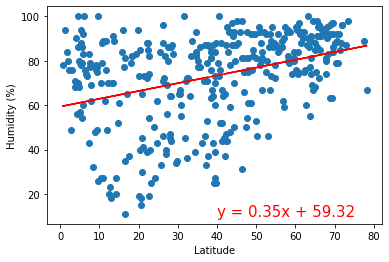

In [228]:
# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, humidity_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, humidity_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, humidity_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05103119858484214


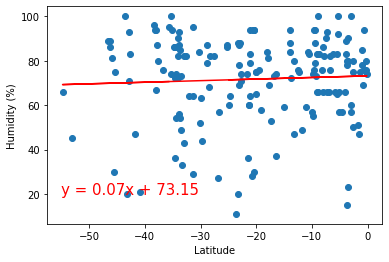

In [229]:
# Humidity of cities in southern hemisphere only
humidity_south = south_df["Humidity"]

# Southern Hemisphere

correlation_coefficient = st.pearsonr(south_hem, humidity_south)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem, humidity_south)
regress_values = south_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_hem, humidity_south)
plt.plot(south_hem,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22509968260022645


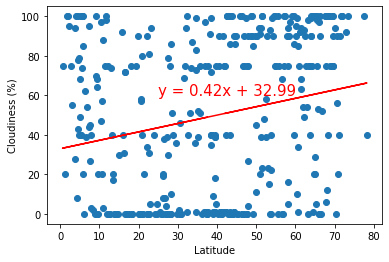

In [230]:
clouds_north = north_df["Cloudiness"]

# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, clouds_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, clouds_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, clouds_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(25,60),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2770974365462552


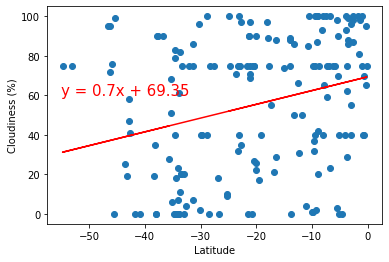

In [231]:
clouds_south = south_df["Cloudiness"]

# Southern Hemisphere

correlation_coefficient = st.pearsonr(south_hem, clouds_south)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem, clouds_south)
regress_values = south_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_hem, clouds_south)
plt.plot(south_hem,regress_values,"r-")

plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.26693821484768615


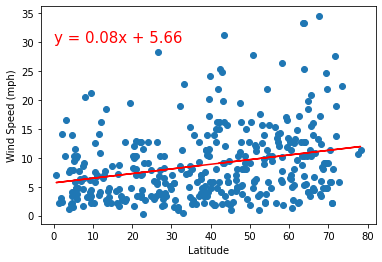

In [232]:
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(int)
wind_north = north_df["Wind Speed"]

# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, wind_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, wind_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, wind_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [233]:

wind_south = south_df["Wind Speed"]


# Northern Hemisphere

correlation_coefficient = st.pearsonr(south_df, wind_south)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df, wind_south)
regress_values = south_df * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_df, wind_south)
plt.plot(south_df,regress_values,"r-")

plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'